In [1]:
#importing dependencies
import pandas as pd
import numpy as np
from numpy import mean
from numpy import std
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import skew
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Lasso,LassoCV,Ridge,RidgeCV
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from sklearn.tree import DecisionTreeRegressor, DecisionTreeClassifier
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import roc_curve, auc, roc_auc_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score, recall_score, f1_score, classification_report, accuracy_score
from sklearn.datasets import make_classification
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.utils import resample
from imblearn.over_sampling import SMOTE
from xgboost import XGBClassifier
from collections import Counter
from sklearn import metrics
from sklearn.model_selection import LeaveOneOut
from sklearn.model_selection import cross_val_score, KFold
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import LabelEncoder
from scipy.stats import boxcox
from sklearn.naive_bayes import GaussianNB


from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.model_selection import GridSearchCV as gs
from sklearn.model_selection import RandomizedSearchCV as rs

import pickle

In [2]:
url='https://raw.githubusercontent.com/dsrscientist/DSData/master/Telecom_customer_churn.csv'
dataset=pd.read_csv(url)

In [3]:
dataset.shape

(7043, 21)

dataset size is moderate

In [4]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [5]:
#checking for null values
dataset.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [6]:
pd.set_option('display.max_columns', None)
dataset.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [7]:
#dropping customerID as it is unique for each and every individual 
dataset.drop(columns=['customerID'],inplace=True)

In [8]:
#locating empty space in the dataset
result = dataset['TotalCharges'].isin([' '])

In [9]:
Names = list(result[result == True].index)
Names

[488, 753, 936, 1082, 1340, 3331, 3826, 4380, 5218, 6670, 6754]

In [10]:
#as empty data is less drop them off
dataset.drop(index=[488, 753, 936, 1082, 1340, 3331, 3826, 4380, 5218, 6670, 6754],inplace=True)
dataset['TotalCharges']=pd.to_numeric(dataset['TotalCharges'])

In [11]:
dataset.shape

(7032, 20)

In [12]:
# count of each unique element repeated in that paritcular column
for i in dataset:
    print(dataset[i].value_counts(),'\n\n')

Male      3549
Female    3483
Name: gender, dtype: int64 


0    5890
1    1142
Name: SeniorCitizen, dtype: int64 


No     3639
Yes    3393
Name: Partner, dtype: int64 


No     4933
Yes    2099
Name: Dependents, dtype: int64 


1     613
72    362
2     238
3     200
4     176
     ... 
38     59
28     57
39     56
44     51
36     50
Name: tenure, Length: 72, dtype: int64 


Yes    6352
No      680
Name: PhoneService, dtype: int64 


No                  3385
Yes                 2967
No phone service     680
Name: MultipleLines, dtype: int64 


Fiber optic    3096
DSL            2416
No             1520
Name: InternetService, dtype: int64 


No                     3497
Yes                    2015
No internet service    1520
Name: OnlineSecurity, dtype: int64 


No                     3087
Yes                    2425
No internet service    1520
Name: OnlineBackup, dtype: int64 


No                     3094
Yes                    2418
No internet service    1520
Name: DeviceProtectio

In [13]:
dataset.nunique()

gender                 2
SeniorCitizen          2
Partner                2
Dependents             2
tenure                72
PhoneService           2
MultipleLines          3
InternetService        3
OnlineSecurity         3
OnlineBackup           3
DeviceProtection       3
TechSupport            3
StreamingTV            3
StreamingMovies        3
Contract               3
PaperlessBilling       2
PaymentMethod          4
MonthlyCharges      1584
TotalCharges        6530
Churn                  2
dtype: int64

In [14]:
dataset.dtypes

gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges        float64
Churn                object
dtype: object

Most of the data in the dataset is ordinal form 

In [15]:
dataset.describe(include='all')

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
count,7032,7032.000000,7032,7032,7032.000000,7032,7032,7032,7032,7032,7032,7032,7032,7032,7032,7032,7032,7032.000000,7032.000000,7032
unique,2,NaN,2,2,NaN,2,3,3,3,3,3,3,3,3,3,2,4,NaN,NaN,2
top,Male,NaN,No,No,NaN,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,NaN,NaN,No
freq,3549,NaN,3639,4933,NaN,6352,3385,3096,3497,3087,3094,3472,2809,2781,3875,4168,2365,NaN,NaN,5163
mean,NaN,0.162400,NaN,NaN,32.421786,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,64.798208,2283.300441,NaN
std,NaN,0.368844,NaN,NaN,24.545260,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,30.085974,2266.771362,NaN
min,NaN,0.000000,NaN,NaN,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,18.250000,18.800000,NaN
25%,NaN,0.000000,NaN,NaN,9.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,35.587500,401.450000,NaN
50%,NaN,0.000000,NaN,NaN,29.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,70.350000,1397.475000,NaN
75%,NaN,0.000000,NaN,NaN,55.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,89.862500,3794.737500,NaN


In [16]:
visual_set=dataset.drop(columns=['tenure','MonthlyCharges','TotalCharges'])

gender


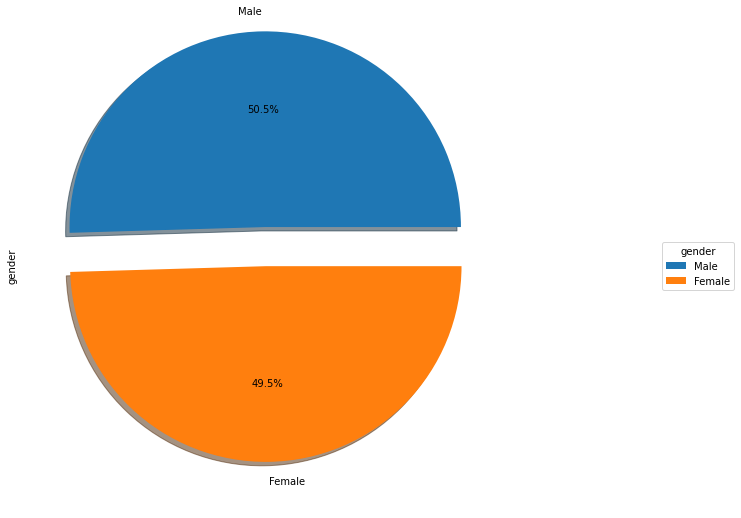




SeniorCitizen


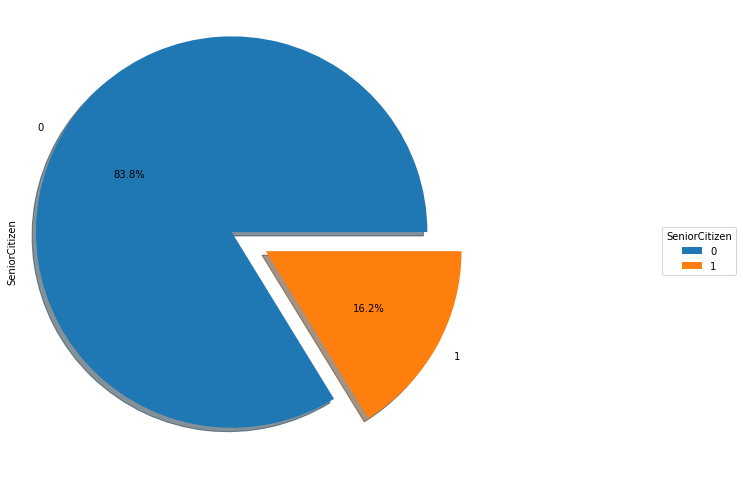




Partner


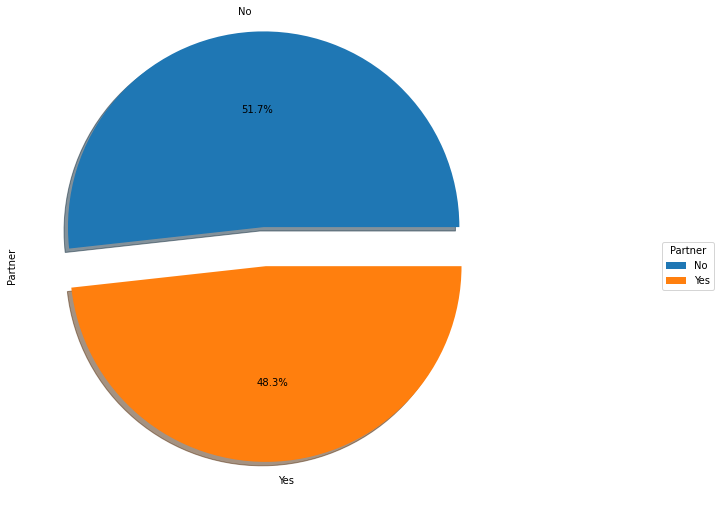




Dependents


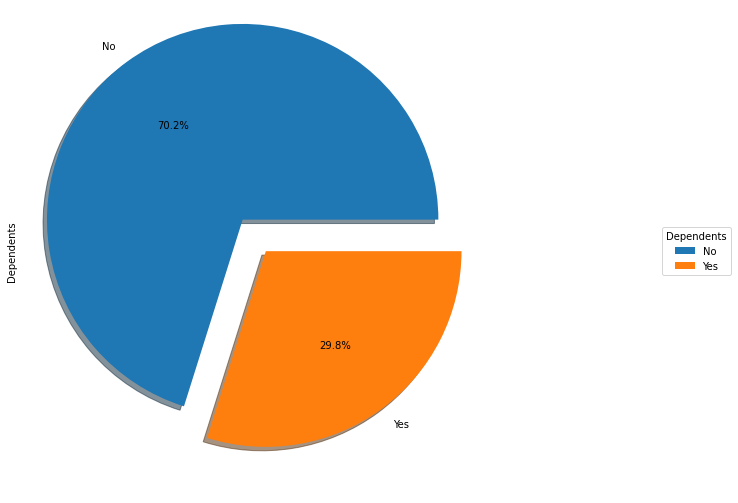




PhoneService


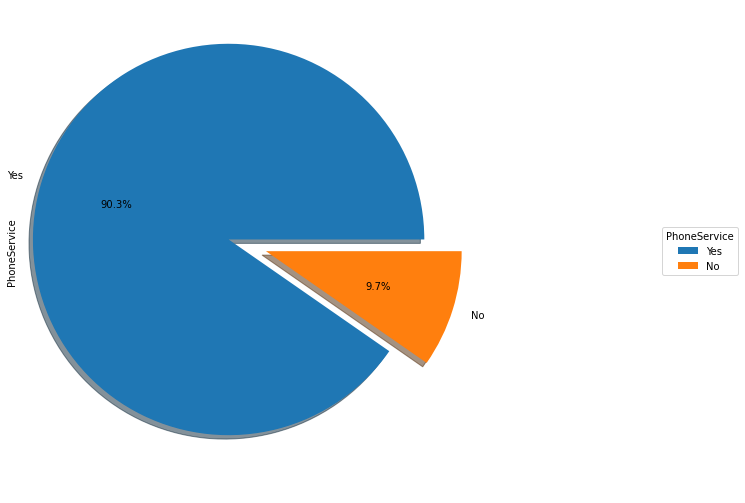




MultipleLines


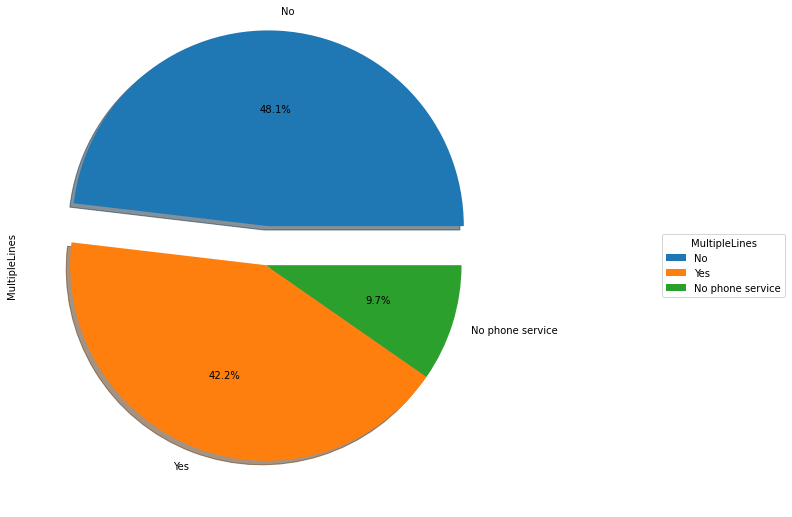




InternetService


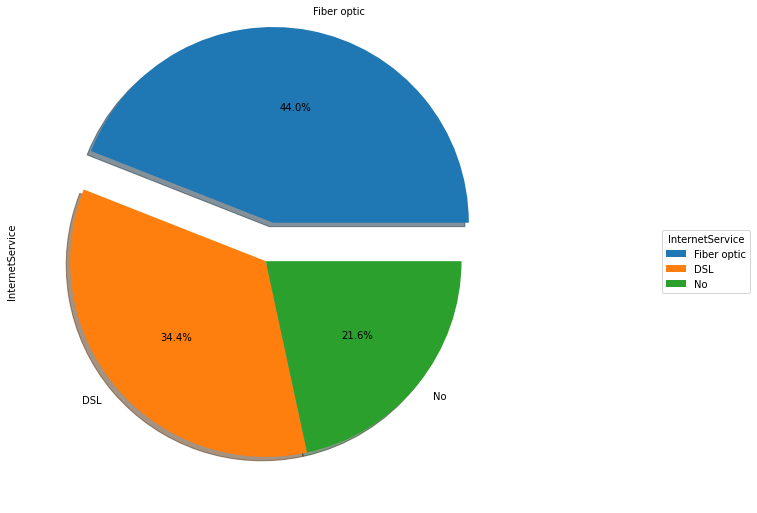




OnlineSecurity


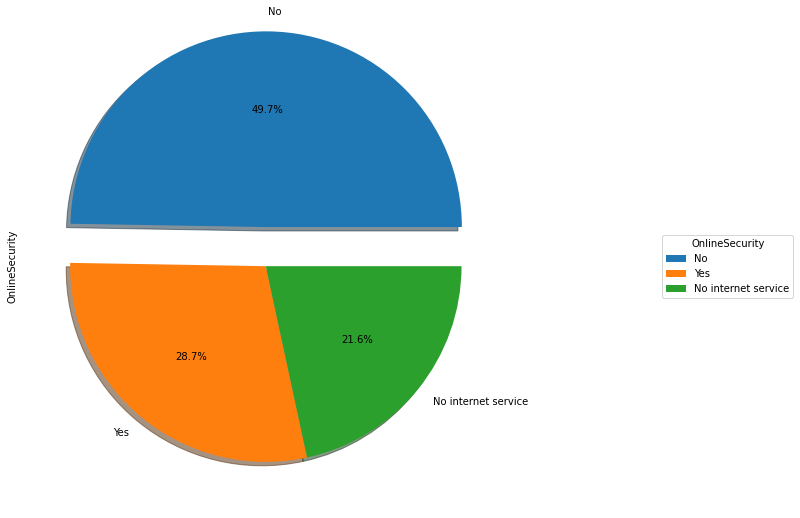




OnlineBackup


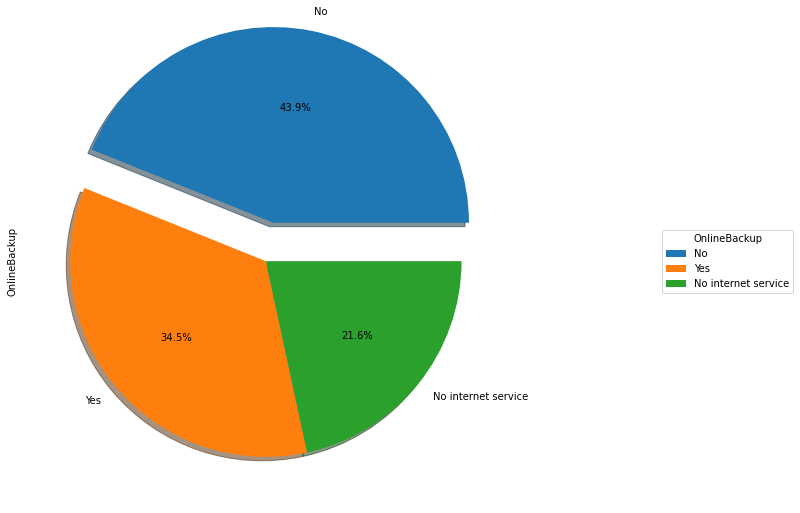




DeviceProtection


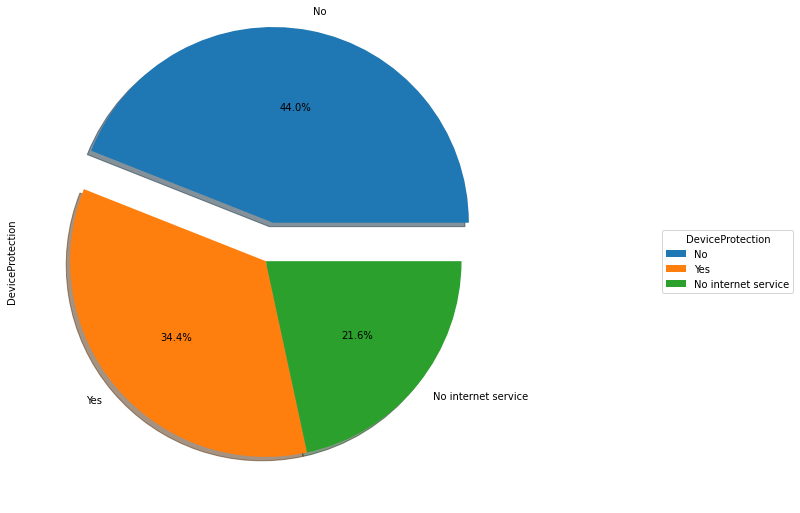




TechSupport


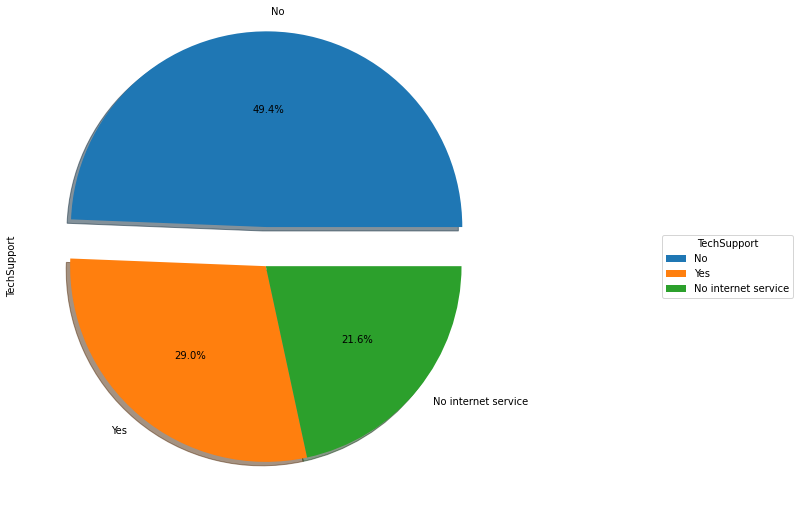




StreamingTV


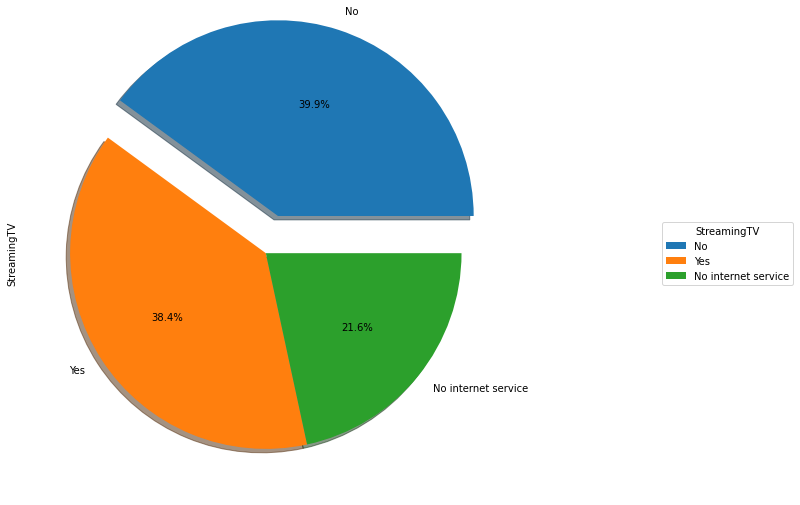




StreamingMovies


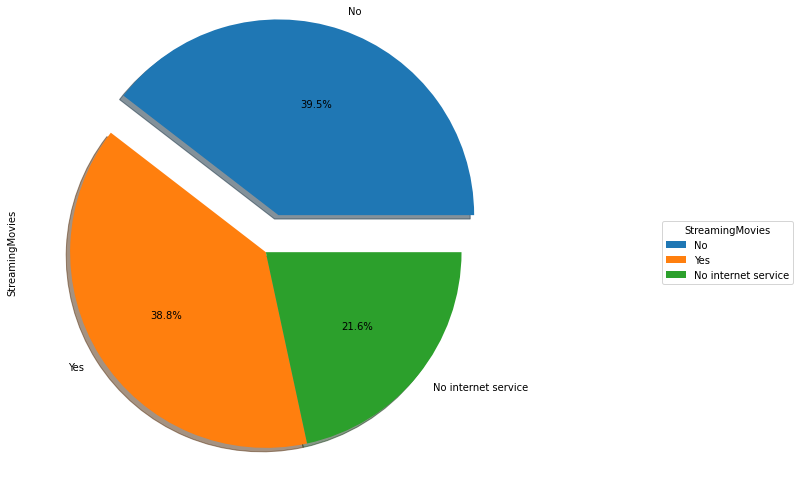




Contract


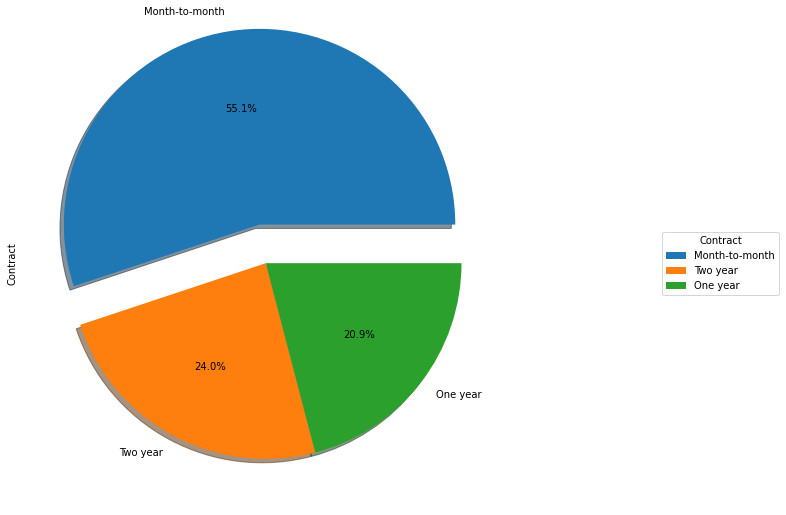




PaperlessBilling


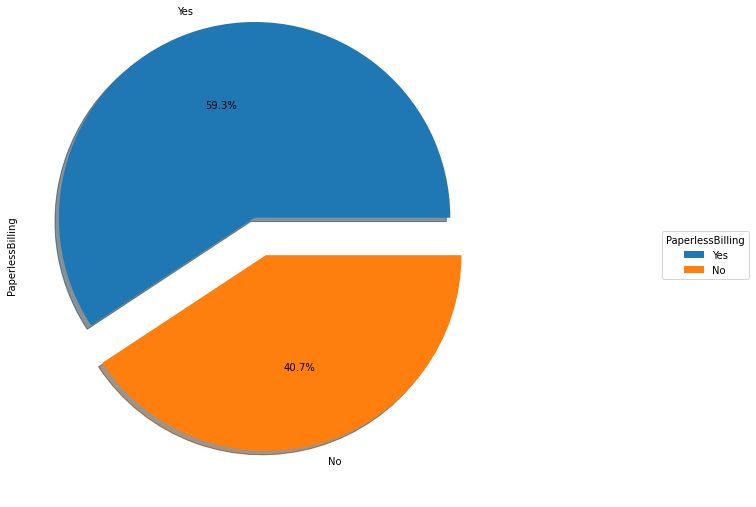




PaymentMethod


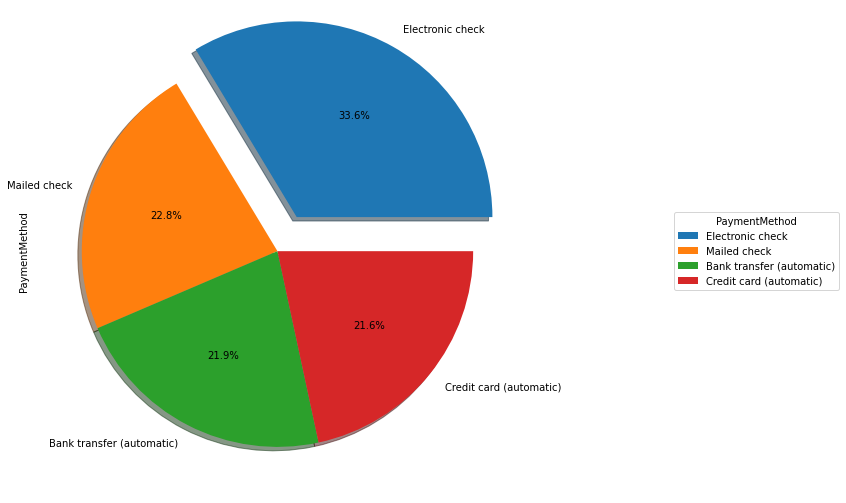




Churn


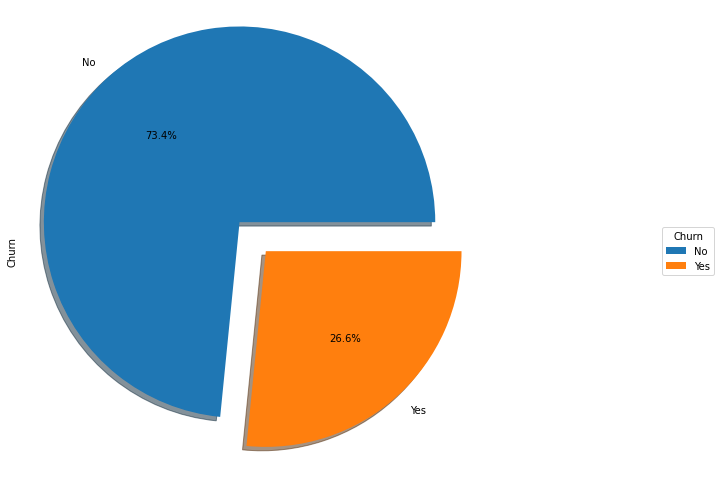

In [17]:
for i in visual_set:
    print('\033[1m'+i+'\033[1m')
    y=visual_set[i].value_counts()
    exp=[0.2]
    j=int(visual_set[i].nunique())
    k=1
    while k < j:
        exp.append(0)
        k+=1
    z=y.plot.pie(figsize=(9,9),explode=exp, autopct='%2.1f%%', shadow=True)
    z.legend(title =i,loc ="center left",bbox_to_anchor =(1.3, 0, 0.5, 1))
    plt.show()
    print('\n\n')

Univariate Analysis:
1. Gender proportion is balanced
2. Majority of the customers are not senior citizens
3. Maximum Customers have No dependencies
4. Most of the customers have phone service
5. Majority don't have Multiple Lines
6. Majority of the customers have Internet Service
7. Most customers dont have online security, backup and they don't stream
8. majority customer like month to month contracts
9. Customer prefer paperless billing
10. They are two ways in which the customers are paying i.e. check or automatic payment
11. Dataset is imbalanced

In [18]:
bi_visualset=dataset.drop(columns=['MonthlyCharges','TotalCharges','tenure'])

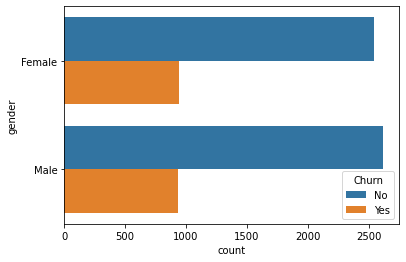

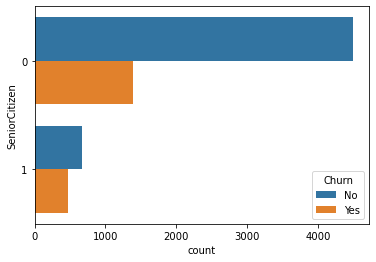

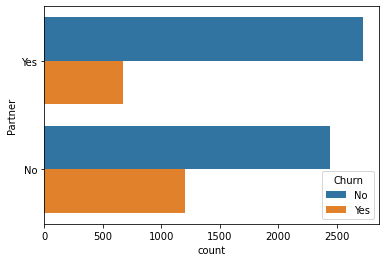

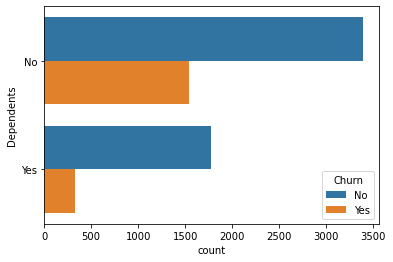

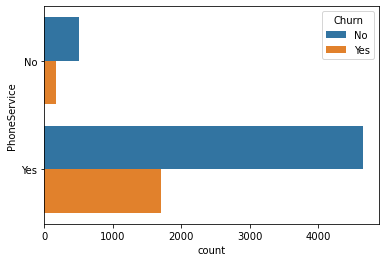

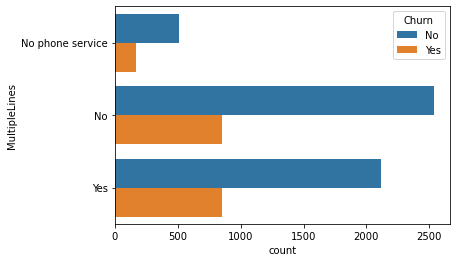

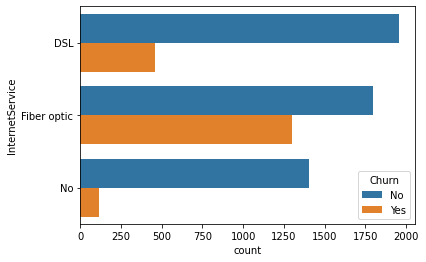

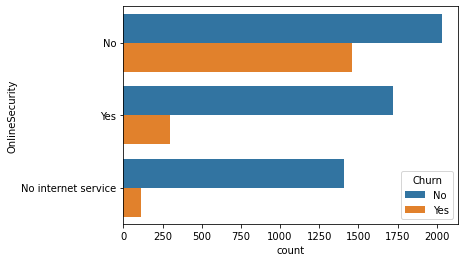

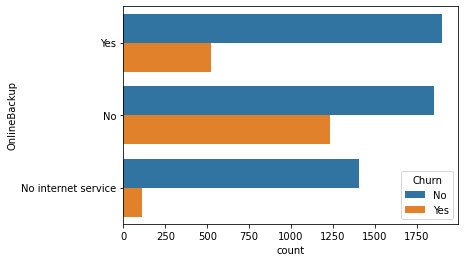

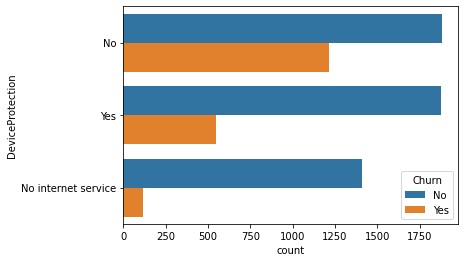

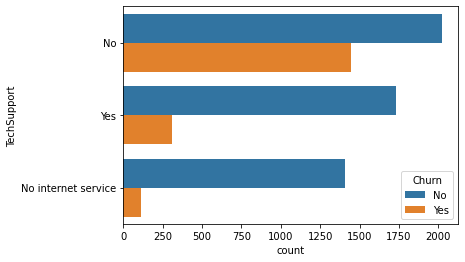

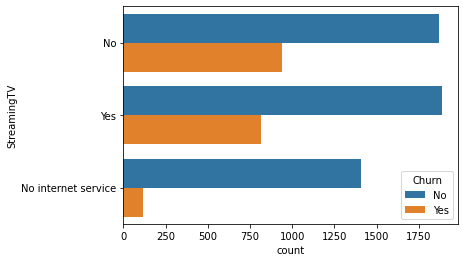

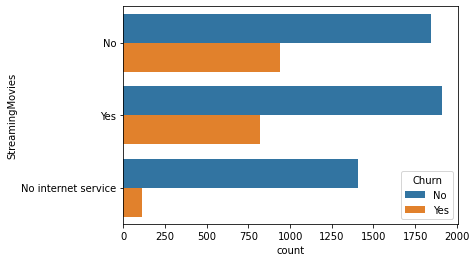

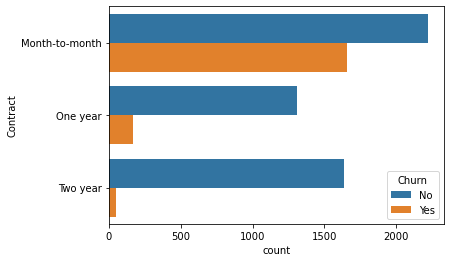

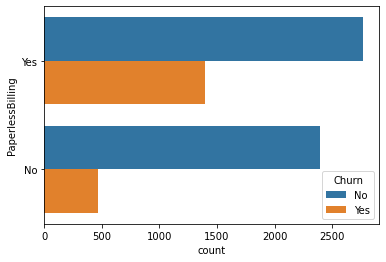

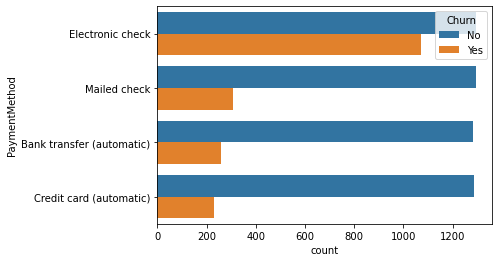

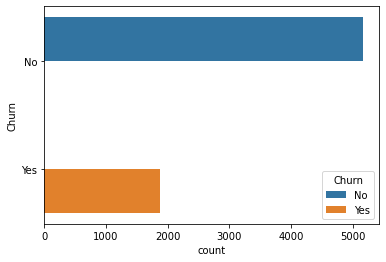

In [19]:
for i in bi_visualset:
    plt.figure(figsize = (6,4))
    ax=sns.countplot(y=i,hue='Churn' ,data=dataset)
    plt.show()
    print('\n\n')

Bi-Variate Analysis:
1. Customer Churn is less in case of senior citizens
2. Customer churn is more likely in case No dependents
3. Customer churn is more for people with phone service
4. Customer who have Internet Service have more churn.
5. Month to month contract to have maximum churn 
6. Customer who pay via check then automatic have more churn

In [20]:
#replacing No phone service as No
dataset.replace('No phone service','No',inplace=True)

In [21]:
#replacing No internet service as No
dataset.replace('No internet service','No',inplace=True)

the type of payment is only of two time its either automatic or check so substituting the 4 parts into 2 parts 

In [22]:
dataset.replace('Credit card (automatic)','Auto pay',inplace=True)
dataset.replace('Bank transfer (automatic)','Auto pay',inplace=True)

In [23]:
dataset.replace('Electronic check','Check pay',inplace=True)
dataset.replace('Mailed check','Check pay',inplace=True)

Fiber optic or DSL indicates that they have internet which means its a yes so replacing them with a yes

In [24]:
dataset.replace('Fiber optic','Yes',inplace=True)
dataset.replace('DSL','Yes',inplace=True)

In [25]:
#checking count of each unique element that are repeated in the columnss
for i in dataset:
    print(dataset[i].value_counts(),'\n\n')

Male      3549
Female    3483
Name: gender, dtype: int64 


0    5890
1    1142
Name: SeniorCitizen, dtype: int64 


No     3639
Yes    3393
Name: Partner, dtype: int64 


No     4933
Yes    2099
Name: Dependents, dtype: int64 


1     613
72    362
2     238
3     200
4     176
     ... 
38     59
28     57
39     56
44     51
36     50
Name: tenure, Length: 72, dtype: int64 


Yes    6352
No      680
Name: PhoneService, dtype: int64 


No     4065
Yes    2967
Name: MultipleLines, dtype: int64 


Yes    5512
No     1520
Name: InternetService, dtype: int64 


No     5017
Yes    2015
Name: OnlineSecurity, dtype: int64 


No     4607
Yes    2425
Name: OnlineBackup, dtype: int64 


No     4614
Yes    2418
Name: DeviceProtection, dtype: int64 


No     4992
Yes    2040
Name: TechSupport, dtype: int64 


No     4329
Yes    2703
Name: StreamingTV, dtype: int64 


No     4301
Yes    2731
Name: StreamingMovies, dtype: int64 


Month-to-month    3875
Two year          1685
One year          147

In [26]:
dataset.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No,Yes,No,Yes,No,No,No,No,Month-to-month,Yes,Check pay,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,Yes,Yes,No,Yes,No,No,No,One year,No,Check pay,56.95,1889.50,No
2,Male,0,No,No,2,Yes,No,Yes,Yes,Yes,No,No,No,No,Month-to-month,Yes,Check pay,53.85,108.15,Yes
3,Male,0,No,No,45,No,No,Yes,Yes,No,Yes,Yes,No,No,One year,No,Auto pay,42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,Yes,No,No,No,No,No,No,Month-to-month,Yes,Check pay,70.70,151.65,Yes


In [27]:
# converting the data into numeric values
le=LabelEncoder()
for i in dataset:
    if dataset[i].dtype=='object':
         dataset[i]=le.fit_transform(dataset[i])

In [28]:
dataset.dtypes

gender                int32
SeniorCitizen         int64
Partner               int32
Dependents            int32
tenure                int64
PhoneService          int32
MultipleLines         int32
InternetService       int32
OnlineSecurity        int32
OnlineBackup          int32
DeviceProtection      int32
TechSupport           int32
StreamingTV           int32
StreamingMovies       int32
Contract              int32
PaperlessBilling      int32
PaymentMethod         int32
MonthlyCharges      float64
TotalCharges        float64
Churn                 int32
dtype: object

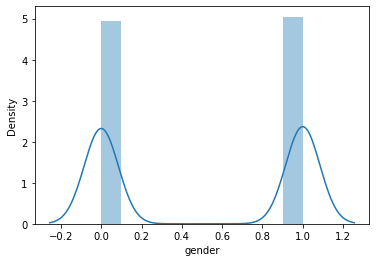

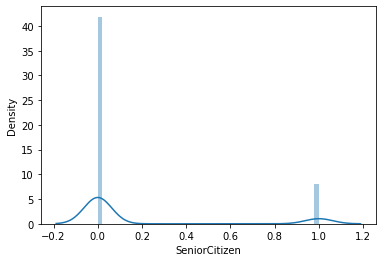

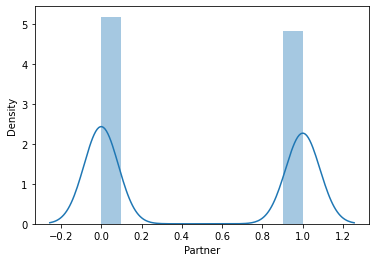

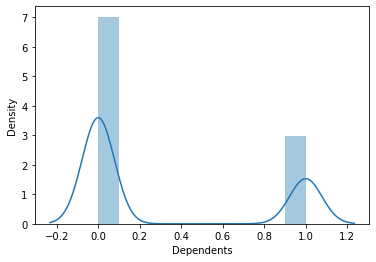

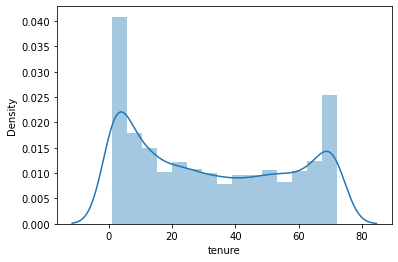

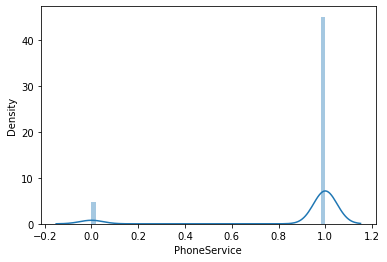

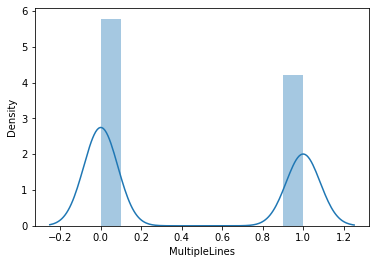

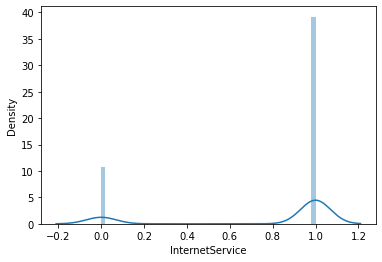

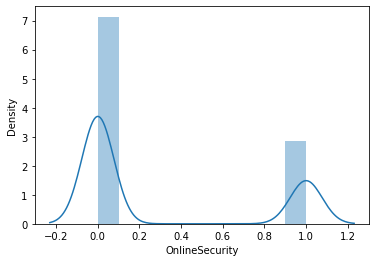

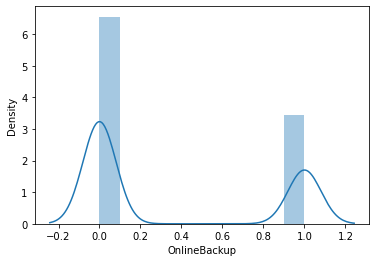

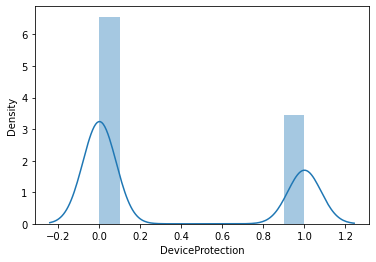

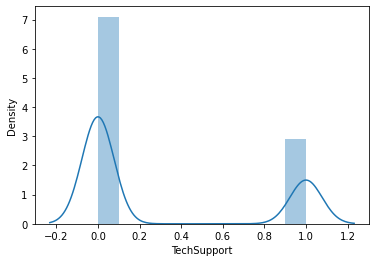

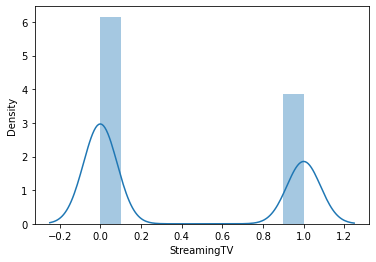

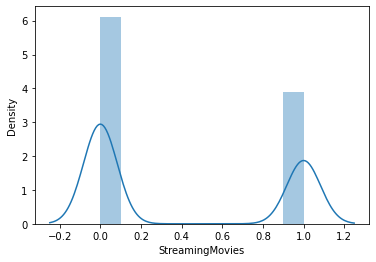

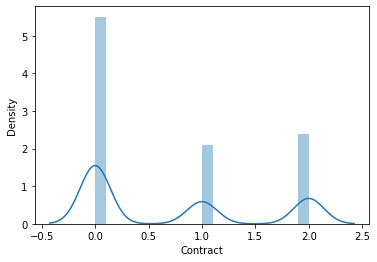

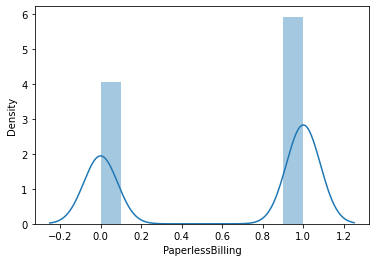

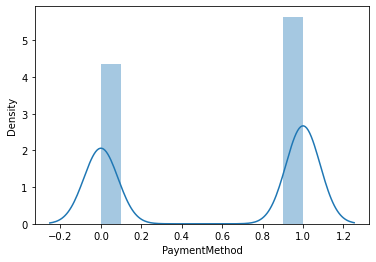

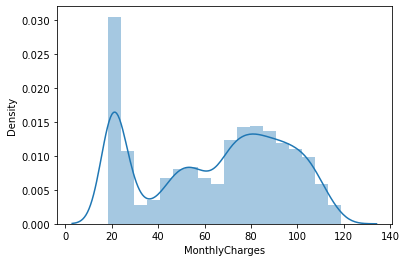

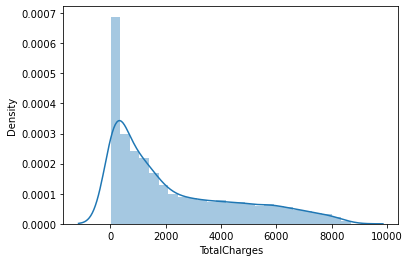

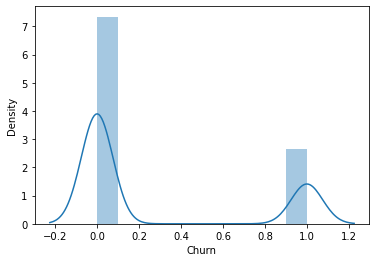

In [29]:
for j in dataset:
    sns.distplot(dataset[j])
    plt.show()

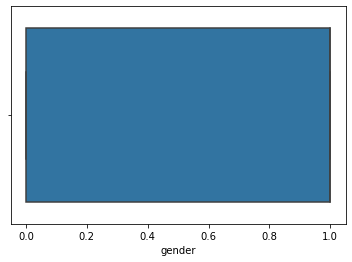

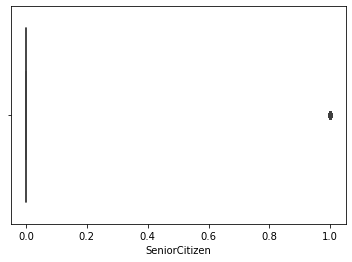

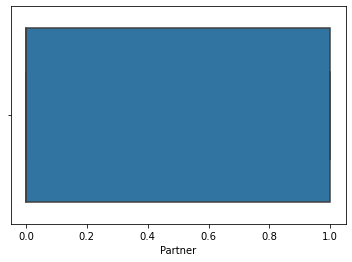

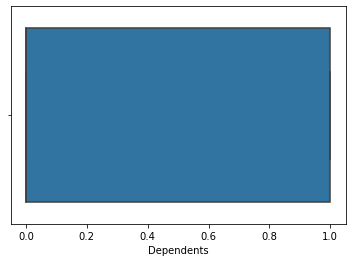

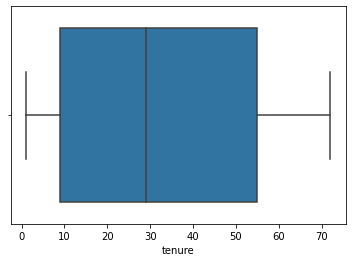

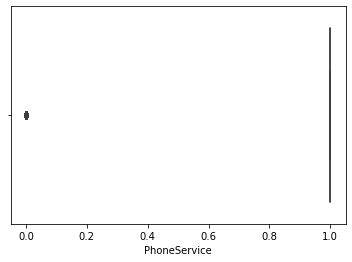

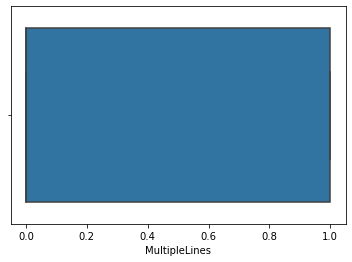

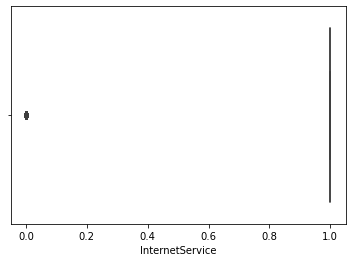

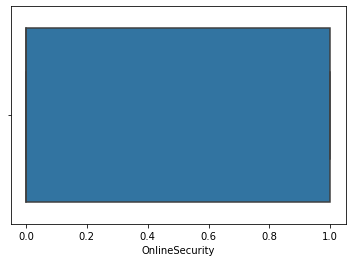

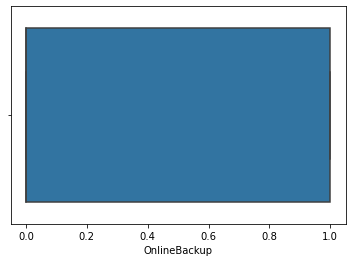

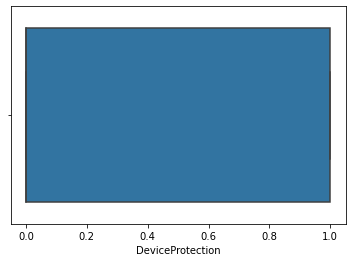

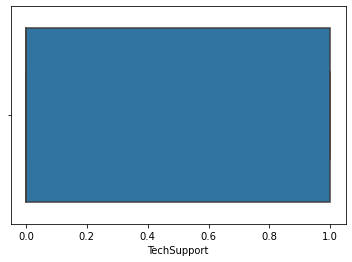

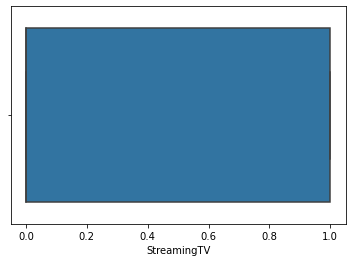

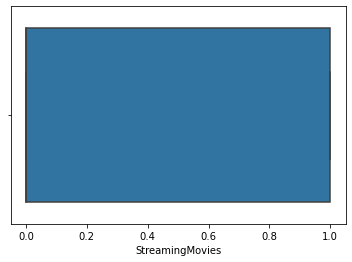

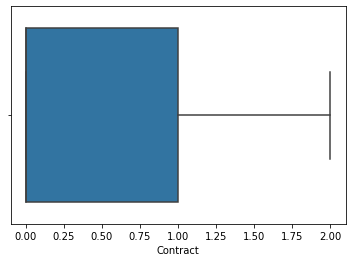

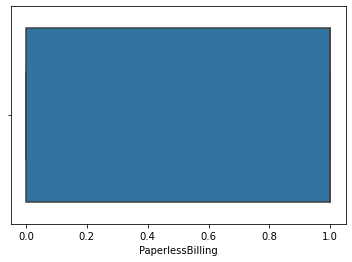

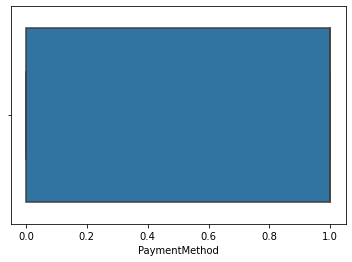

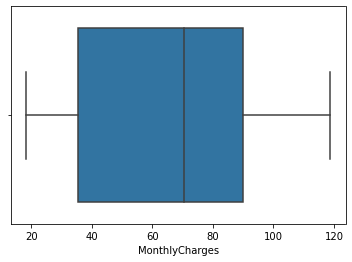

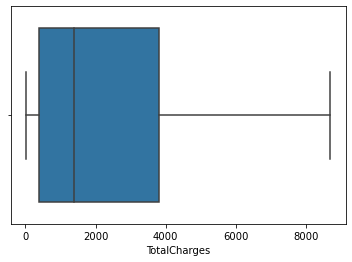

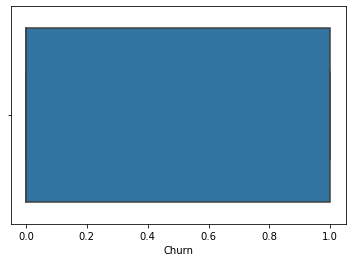

In [30]:
for k in dataset:
    sns.boxplot(dataset[k])
    plt.show()

They are no null values in the dataset

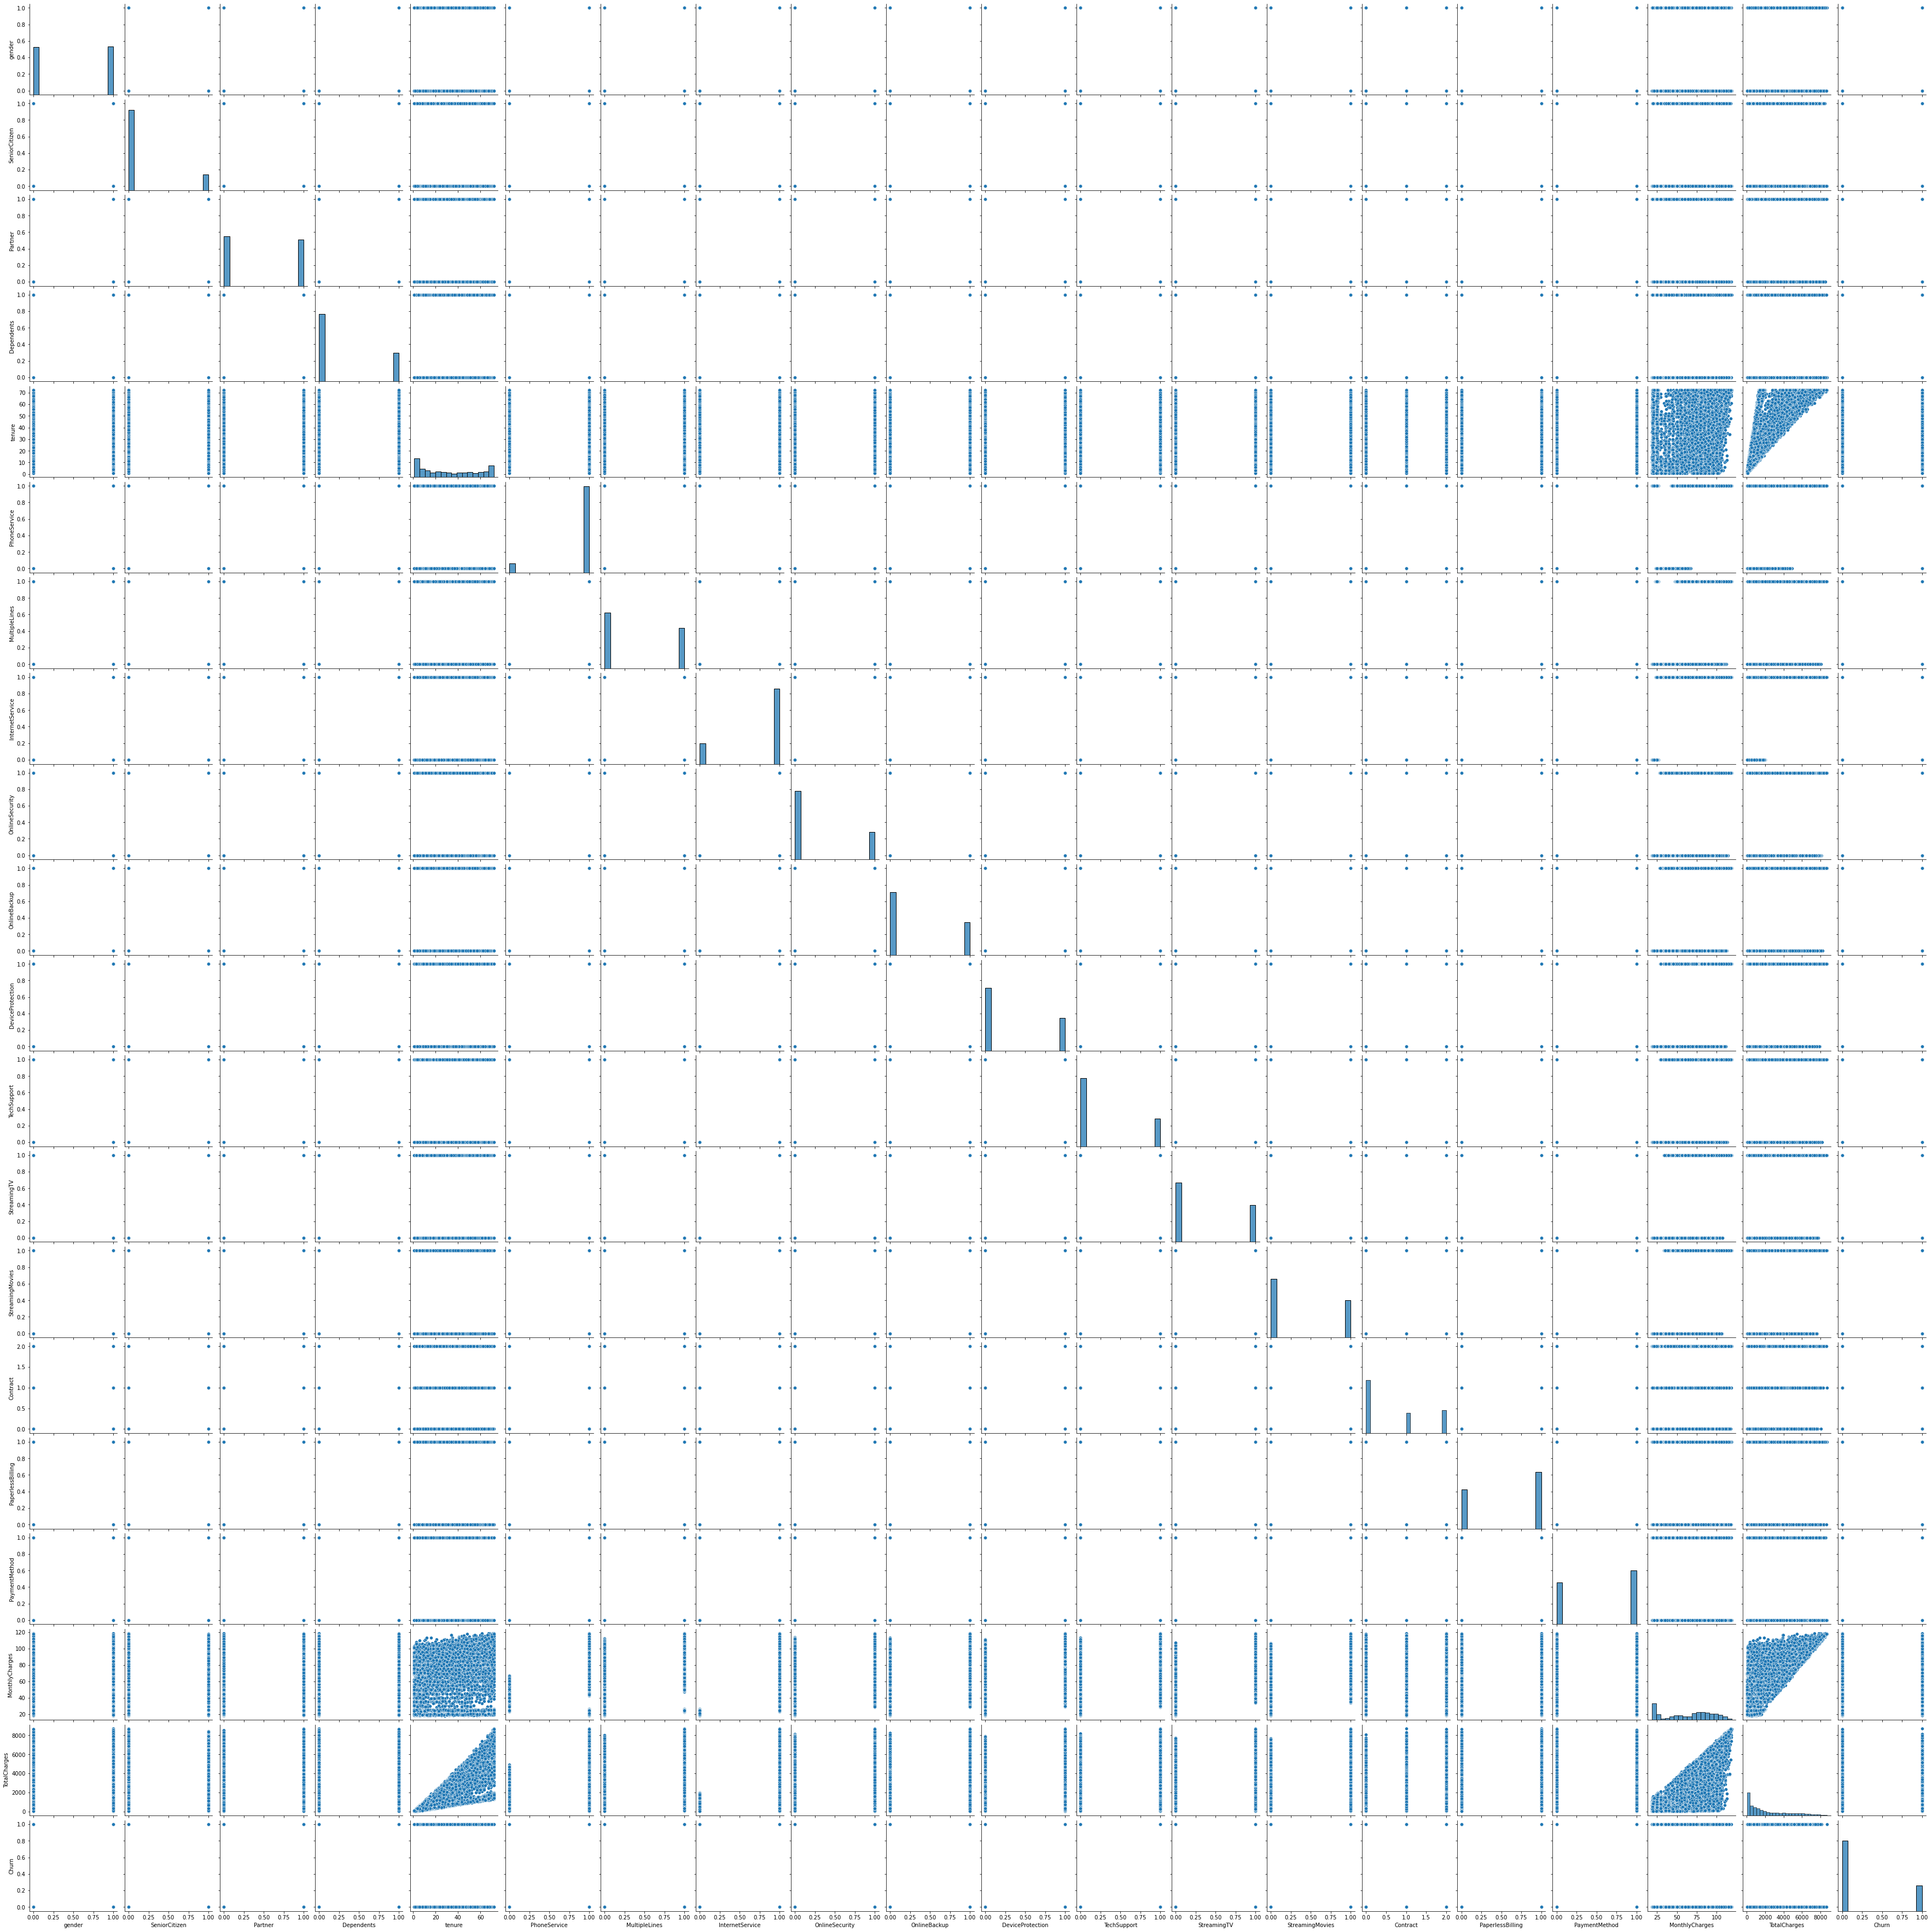

In [31]:
sns.pairplot(dataset)

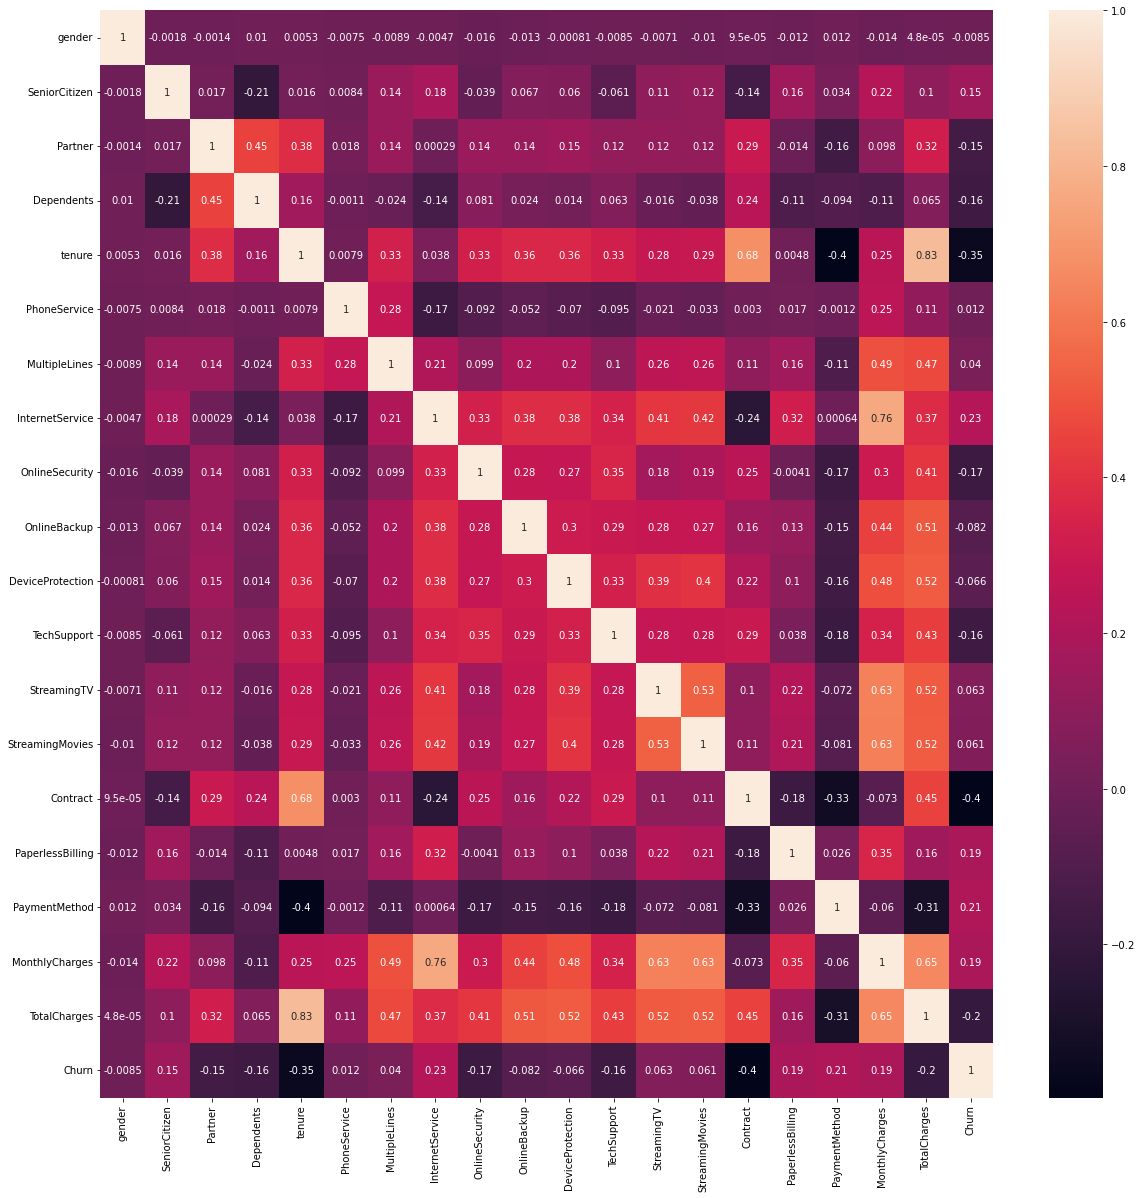

In [32]:
plt.figure(figsize=(20,20))
sns.heatmap(dataset.corr(), annot=True)
plt.show()

In [33]:
#removing the columns as they share high multi collinearity with other columns 
dataset.drop(columns=['Partner','Dependents','TotalCharges','MonthlyCharges','OnlineSecurity','OnlineBackup','StreamingTV','StreamingMovies'],inplace=True)

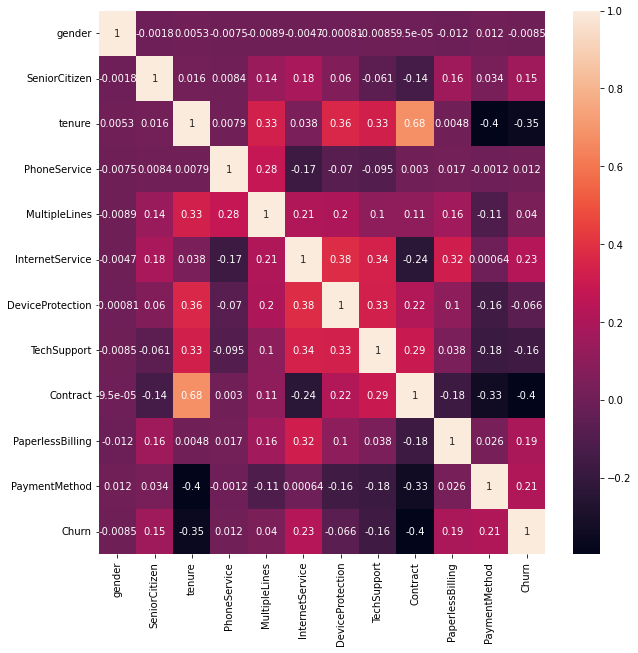

In [34]:
plt.figure(figsize=(10,10))
sns.heatmap(dataset.corr(), annot=True)
plt.show()

In [38]:
# tech support and device protection have corelation with internet service
dataset.drop(columns=['TechSupport','DeviceProtection'],inplace=True)

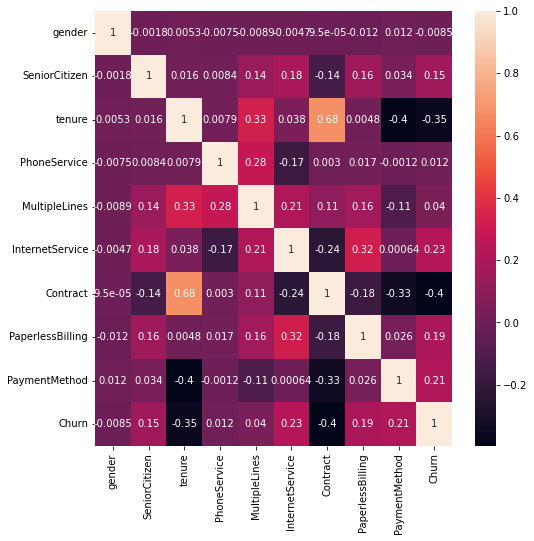

In [39]:
plt.figure(figsize=(8,8))
sns.heatmap(dataset.corr(), annot=True)
plt.show()

In [40]:
# separating target and feature columns
X=dataset.drop(columns=['Churn'])
Y=dataset['Churn']
scalar= StandardScaler()
X_scaled= scalar.fit_transform(X)

In [41]:
#checking VIF value 
vif_data = pd.DataFrame()
vif_data["feature"] = X.columns

vif_data["VIF"] = [variance_inflation_factor(X_scaled, i) for i in range(X_scaled.shape[1])]
  
vif_data

,feature,VIF
0,gender,1.000602
1,SeniorCitizen,1.076866
2,tenure,2.361572
3,PhoneService,1.171074
4,MultipleLines,1.361351
5,InternetService,1.349550
6,Contract,2.244918
7,PaperlessBilling,1.157862
8,PaymentMethod,1.199161


In [42]:
#upsampling the data to make the data balance
oversample= SMOTE()
X_over,Y_over=oversample.fit_resample(X_scaled,Y)

EDA:
1. dataset size is moderate 
2. removed null values
3. removed complexion in the data
4. absence of outliers in the dataset
5. removed multi-collinearity columns 
6. balanced the dataset

In [43]:
X_train, X_test, Y_train, Y_test= train_test_split(X_over,Y_over,test_size=0.2,stratify=Y_over)

In [44]:
Counter(Y_train)

Counter({0: 4130, 1: 4130})

In [45]:
Counter(Y_test)

Counter({1: 1033, 0: 1033})

In [46]:
xgb= XGBClassifier()
param={
    'n_estimators':[150,200,300,400,500],
    'learning_rate':[0.1,0.15,0.2],
    'subsample':[0.3,0.4,0.6],
    'max_depth':[3,5,7,9,10],
    'colsample_bytree':[0.1,0.2,0.3,0.4],
    'min_child_weight':[1,2,3,4,5],
}
xgb_C=gs(xgb,param_grid=param,cv=10,refit=True,n_jobs=5)
xgb_C.fit(X_train,Y_train)

[15:38:38] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


GridSearchCV(cv=10,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None,
                                     enable_categorical=False, gamma=None,
                                     gpu_id=None, importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None, max_delta_step=None,
                                     max_depth=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None...
                                     random_state=None, reg_alpha=None,
                                     reg_lambda=None, scale_pos_weight=None,
                                     subsample=None, tree_method=None,
                                     validate_parameters=None, v

In [47]:
rfc=RandomForestClassifier()
para={
      'max_depth':[1,2,3,4,5],
    'min_samples_split':[1,2,3,4],
    'max_leaf_nodes':[10,20,30,40,50],
    'min_samples_leaf':[100,200,300,400],
    'n_estimators':[200,250,300,350],
    'max_samples': [0.1,0.2,0.3,0.4],
    'max_features':[5,6,7,8,9]
}
rfc_gs= gs(estimator =rfc, param_grid=para,cv=10, n_jobs=10)
rfc_gs.fit(X_train,Y_train)

GridSearchCV(cv=10, estimator=RandomForestClassifier(), n_jobs=10,
             param_grid={'max_depth': [1, 2, 3, 4, 5],
                         'max_features': [5, 6, 7, 8, 9],
                         'max_leaf_nodes': [10, 20, 30, 40, 50],
                         'max_samples': [0.1, 0.2, 0.3, 0.4],
                         'min_samples_leaf': [100, 200, 300, 400],
                         'min_samples_split': [1, 2, 3, 4],
                         'n_estimators': [200, 250, 300, 350]})

In [49]:
rfc_gs.best_score_

0.761501210653753

In [50]:
xgb_C.best_score_

0.8299031476997578

In [51]:
rfc_gs.best_estimator_

RandomForestClassifier(max_depth=5, max_features=6, max_leaf_nodes=20,
                       max_samples=0.3, min_samples_leaf=100,
                       min_samples_split=4, n_estimators=250)

In [52]:
xgb_C.best_estimator_

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.4,
              enable_categorical=False, gamma=0, gpu_id=-1,
              importance_type=None, interaction_constraints='',
              learning_rate=0.2, max_delta_step=0, max_depth=9,
              min_child_weight=3, missing=nan, monotone_constraints='()',
              n_estimators=500, n_jobs=8, num_parallel_tree=1, predictor='auto',
              random_state=0, reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
              subsample=0.6, tree_method='exact', validate_parameters=1,
              verbosity=None)

In [54]:
model1=XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.4,
              enable_categorical=False, gamma=0, gpu_id=-1,
              importance_type=None, interaction_constraints='',
              learning_rate=0.2, max_delta_step=0, max_depth=9,
              min_child_weight=3, monotone_constraints='()',
              n_estimators=500, n_jobs=8, num_parallel_tree=1, predictor='auto',
              random_state=0, reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
              subsample=0.6, tree_method='exact', validate_parameters=1,
              verbosity=None)
model1.fit(X_train,Y_train)
X_test_predict1= model1.predict(X_test)

print(classification_report(Y_test,X_test_predict1))

[20:06:36] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
              precision    recall  f1-score   support

           0       0.84      0.80      0.82      1033
           1       0.81      0.84      0.83      1033

    accuracy                           0.82      2066
   macro avg       0.82      0.82      0.82      2066
weighted avg       0.82      0.82      0.82      2066



In [55]:
model2=RandomForestClassifier(max_depth=5, max_features=6, max_leaf_nodes=20,
                       max_samples=0.3, min_samples_leaf=100,
                       min_samples_split=4, n_estimators=250)
model2.fit(X_train,Y_train)
X_test_predict2= model2.predict(X_test)

print(classification_report(Y_test,X_test_predict2))

              precision    recall  f1-score   support

           0       0.80      0.68      0.73      1033
           1       0.72      0.83      0.77      1033

    accuracy                           0.76      2066
   macro avg       0.76      0.76      0.75      2066
weighted avg       0.76      0.76      0.75      2066



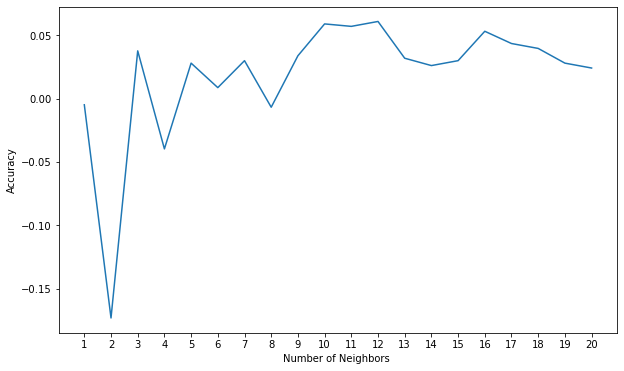

In [56]:
knc = KNeighborsClassifier()
mean_acc = np.zeros(20)
for i in range(1,21):
    #Train Model and Predict  
    knc = KNeighborsClassifier(n_neighbors = i).fit(X_train,Y_train)
    yhat2= knc.predict(X_test)
    mean_acc[i-1] = metrics.r2_score(Y_test, yhat2)

loc = np.arange(1,21,step=1.0)
plt.figure(figsize = (10, 6))
plt.plot(range(1,21), mean_acc)
plt.xticks(loc)
plt.xlabel('Number of Neighbors ')
plt.ylabel('Accuracy')
plt.show()

In [58]:
knn=KNeighborsClassifier()
para={
        'n_neighbors':[1,3,4,9,10,11,12,13],
        'weights':['uniform', 'distance'],
        'algorithm':['auto', 'ball_tree', 'kd_tree', 'brute','auto'],
        'leaf_size':[30,40,50],
        'p':[1,2,3,4,5],
        'metric':['minkowski']
    
}
knn_gs= gs(estimator =knn, param_grid=para,cv=10, n_jobs=5)
knn_gs.fit(X_train,Y_train)

GridSearchCV(cv=10, estimator=KNeighborsClassifier(), n_jobs=5,
             param_grid={'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute',
                                       'auto'],
                         'leaf_size': [30, 40, 50], 'metric': ['minkowski'],
                         'n_neighbors': [1, 3, 4, 9, 10, 11, 12, 13],
                         'p': [1, 2, 3, 4, 5],
                         'weights': ['uniform', 'distance']})

In [60]:
knn_gs.best_score_

0.7645278450363197

In [61]:
knn_gs.best_estimator_

KNeighborsClassifier(algorithm='brute', n_neighbors=13, weights='distance')

In [62]:
model3=KNeighborsClassifier(algorithm='brute', n_neighbors=13, weights='distance')
model3.fit(X_train,Y_train)
X_test_predict3= model3.predict(X_test)

print(classification_report(Y_test,X_test_predict3))

              precision    recall  f1-score   support

           0       0.77      0.77      0.77      1033
           1       0.77      0.77      0.77      1033

    accuracy                           0.77      2066
   macro avg       0.77      0.77      0.77      2066
weighted avg       0.77      0.77      0.77      2066



In [63]:
nb_classifier = GaussianNB()

params_NB = {'var_smoothing': np.logspace(0,-9, num=1000)}
gs_NB = gs(estimator=nb_classifier, 
                 param_grid=params_NB, 
                 cv=10,
                 verbose=1, 
                 scoring='accuracy') 
gs_NB.fit(X_train,Y_train)

Fitting 10 folds for each of 1000 candidates, totalling 10000 fits


GridSearchCV(cv=10, estimator=GaussianNB(),
             param_grid={'var_smoothing': array([1.00000000e+00, 9.79469667e-01, 9.59360829e-01, 9.39664831e-01,
       9.20373200e-01, 9.01477631e-01, 8.82969996e-01, 8.64842328e-01,
       8.47086827e-01, 8.29695852e-01, 8.12661920e-01, 7.95977700e-01,
       7.79636013e-01, 7.63629826e-01, 7.47952252e-01, 7.32596543e-01,
       7.17556092e-01, 7.02824426e-01, 6.8...
       1.61141428e-09, 1.57833141e-09, 1.54592774e-09, 1.51418933e-09,
       1.48310251e-09, 1.45265393e-09, 1.42283046e-09, 1.39361927e-09,
       1.36500781e-09, 1.33698374e-09, 1.30953502e-09, 1.28264983e-09,
       1.25631660e-09, 1.23052400e-09, 1.20526094e-09, 1.18051653e-09,
       1.15628013e-09, 1.13254132e-09, 1.10928986e-09, 1.08651577e-09,
       1.06420924e-09, 1.04236067e-09, 1.02096066e-09, 1.00000000e-09])},
             scoring='accuracy', verbose=1)

In [64]:
gs_NB.best_score_

0.7468523002421306

In [65]:
gs_NB.best_estimator_

GaussianNB(var_smoothing=0.028804441533962964)

In [66]:
model4=GaussianNB(var_smoothing=0.028804441533962964)
model4.fit(X_train,Y_train)
X_test_predict4= model4.predict(X_test)

print(classification_report(Y_test,X_test_predict4))

              precision    recall  f1-score   support

           0       0.80      0.64      0.71      1033
           1       0.70      0.84      0.76      1033

    accuracy                           0.74      2066
   macro avg       0.75      0.74      0.74      2066
weighted avg       0.75      0.74      0.74      2066



In [67]:
logr = LogisticRegression()
solvers = ['newton-cg', 'lbfgs', 'liblinear']
penalty = ['l2']
c_values = [100, 10, 1.0, 0.1, 0.01]
# define grid search
grid = dict(solver=solvers,penalty=penalty,C=c_values)
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
grid_search = gs(estimator=logr, param_grid=grid, n_jobs=10, cv=cv, scoring='accuracy',error_score=0)
grid_search.fit(X_train,Y_train)

GridSearchCV(cv=RepeatedStratifiedKFold(n_repeats=3, n_splits=10, random_state=1),
             error_score=0, estimator=LogisticRegression(), n_jobs=10,
             param_grid={'C': [100, 10, 1.0, 0.1, 0.01], 'penalty': ['l2'],
                         'solver': ['newton-cg', 'lbfgs', 'liblinear']},
             scoring='accuracy')

In [68]:
grid_search.best_score_

0.7527441485068603

In [69]:
grid_search.best_estimator_

LogisticRegression(C=100, solver='newton-cg')

In [70]:
model5=LogisticRegression(C=100, solver='newton-cg')
model5.fit(X_train,Y_train)
X_test_predict5= model5.predict(X_test)

print(classification_report(Y_test,X_test_predict5))

              precision    recall  f1-score   support

           0       0.79      0.69      0.74      1033
           1       0.73      0.82      0.77      1033

    accuracy                           0.75      2066
   macro avg       0.76      0.75      0.75      2066
weighted avg       0.76      0.75      0.75      2066



In [71]:
false_positive_rate1, true_positive_rate1, threshold1 = roc_curve(Y_test, X_test_predict1)
false_positive_rate2, true_positive_rate2, threshold2 = roc_curve(Y_test, X_test_predict2)
false_positive_rate3, true_positive_rate3, threshold3 = roc_curve(Y_test, X_test_predict3)
false_positive_rate4, true_positive_rate4, threshold4 = roc_curve(Y_test, X_test_predict4)
false_positive_rate5, true_positive_rate5, threshold5 = roc_curve(Y_test, X_test_predict5)


print('roc_auc_score for XGB Classifier: ', roc_auc_score(Y_test, X_test_predict1))
print('roc_auc_score for Random Forest Classifier: ', roc_auc_score(Y_test, X_test_predict2))
print('roc_auc_score for KNeighbors Classifier: ', roc_auc_score(Y_test, X_test_predict3))
print('roc_auc_score for GaussianNB: ', roc_auc_score(Y_test, X_test_predict4))
print('roc_auc_score for Logistic Regression: ', roc_auc_score(Y_test, X_test_predict5))


roc_auc_score for XGB Classifier:  0.8228460793804452
roc_auc_score for Random Forest Classifier:  0.7555663117134559
roc_auc_score for KNeighbors Classifier:  0.7696030977734752
roc_auc_score for GaussianNB:  0.7415295256534365
roc_auc_score for Logistic Regression:  0.7545982575024202


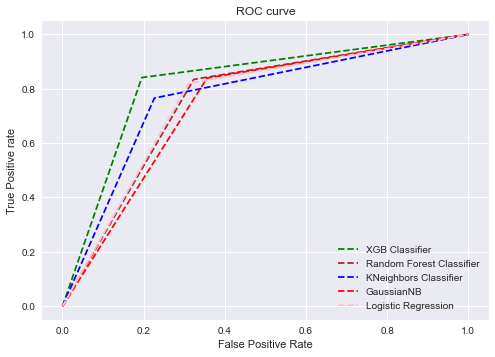

In [72]:
plt.style.use('seaborn')

# plot roc curves
plt.plot(false_positive_rate1, true_positive_rate1, linestyle='--',color='green', label='XGB Classifier')
plt.plot(false_positive_rate2, true_positive_rate2, linestyle='--',color='brown', label='Random Forest Classifier')
plt.plot(false_positive_rate3, true_positive_rate3, linestyle='--', color='blue', label='KNeighbors Classifier')
plt.plot(false_positive_rate4, true_positive_rate4, linestyle='--', color='red', label='GaussianNB')
plt.plot(false_positive_rate5, true_positive_rate5, linestyle='--', color='pink', label='Logistic Regression')

# title
plt.title('ROC curve')
# x label
plt.xlabel('False Positive Rate')
# y label
plt.ylabel('True Positive rate')

plt.legend(loc='best')
plt.savefig('ROC',dpi=300)
plt.show();

Selecting XGB Classifier as it have better precision, recall and f1 score compared to all the other models

In [73]:
#saving the model
XGB_classifier= pickle.dumps(model1)